In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


#1. Load the data from CSV file.
dataset=pd.read_csv('C:/Users/amal/Desktop/CPCS433_Ass3_AMAL/insurance.csv')
dataset.insert(0, "x1",np.ones(dataset.shape[0]),True)

#-----------------------------------------------------------------------------------------------------

#2. Divide the dataset into training and testing (use splitting ratio 80:20)
training=dataset[:int(len(dataset)*0.8)] #80% of the dataset for the training
testing=dataset[int(len(dataset)*0.8):]  #20% of the dataset for the testing

#-----------------------------------------------------------------------------------------------------

#3. Impute any missing value and convert categorical values to numerical.
print(dataset.isnull().sum())
pd.options.mode.chained_assignment = None  # default='warn' 

#for the 'age','bmi','charges' consider missing value = 0 or NaN
#for 'sex','children','smoker','region', consider missing value =NaN

training[['age','bmi','charges']] = training[['age','bmi','charges']].replace(0, np.NaN)
training.fillna(training.mean(), inplace=True)

testing[['age','bmi','charges']] = testing[['age','bmi','charges']].replace(0, np.NaN)
testing.fillna(testing.mean(), inplace=True)

#categorical values= 'sex', 'smoker', 'region'

labelencoder_X = LabelEncoder()

training[['sex']]= labelencoder_X.fit_transform(training[['sex']])
training[['smoker']]= labelencoder_X.fit_transform(training[['smoker']])
training[['region']]= labelencoder_X.fit_transform(training[['region']])

testing[['sex']]= labelencoder_X.fit_transform(testing[['sex']])
testing[['smoker']]= labelencoder_X.fit_transform(testing[['smoker']])
testing[['region']]= labelencoder_X.fit_transform(testing[['region']])

#-----------------------------------------------------------------------------------------------------

#4. Train a linear regression model using a gradient descent algorithm with a mean square
#error (MSE) cost-function, learning rate 𝜶=0.01, and stopping condition number of iteration=150.

alpha = 0.001
iteration= 150 # 150 iteration case infinety 
theta = np.zeros(training.shape[1]-1)
x=training.iloc[:, :7]
y=training.iloc[:,-1]

MSE=[]
arr=[]

for i in range(iteration):
    arr.append(i)
    MSE.append(np.sum((y-x.dot(theta)) ** 2)/(training.shape[0]))#mean squar error
    gradient = (-2/training.shape[0])*((y-x.dot(theta)).dot(x))
    theta = theta - alpha * gradient

#-----------------------------------------------------------------------------------------------------

#5. Keep a record of the cost at each iteration and plot the cost at each iteration against iterations.

print('\n*********************************Linear regression model*********************************\n\n')

print('Total number of Data',dataset.shape[0])
print('Total number of training Data',training.shape[0])
print('Total number of testing Data',testing.shape[0],'\n')


plt.figure(figsize=(5,5))
plt.title('cost at each iteration')
plt.xlabel('itreation')
plt.ylabel('MSE')
plt.scatter(arr, MSE) #c=['red','green','blue']
plt.show()
#-----------------------------------------------------------------------------------------------------

#6. Test the performance of the model by computing and reporting the MSE on the testing set.

x=testing.iloc[:, :7]
y=testing.iloc[:,-1]
cost = np.sum((y-x.dot(theta)) ** 2)/testing.shape[0] #mean squar error
print('\nMean Square Error for the testing set :',cost)


#-----------------------------------------------------------------------------------------------------

#7. Find and report the most significant features in the regression model.
print('\n')
significant=theta.copy()
significant=significant.sort_values(ascending=True)
print('features parameter \n',significant)
print('\nThe Most significant feature\n',min(significant))
#-----------------------------------------------------------------------------------------------------


FileNotFoundError: [Errno 2] File b'C:/Users/amal/Desktop/CPCS433_Ass3_AMAL/insurance.csv' does not exist: b'C:/Users/amal/Desktop/CPCS433_Ass3_AMAL/insurance.csv'


*********************************Linear regression model*********************************


Total number of Data 1338
Total number of training Data 1070
Total number of testing Data 268 



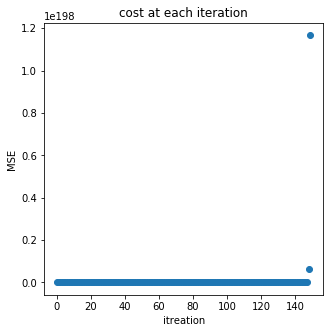


Mean Square Error for the testing set : 2.0382281228663587e+199


features parameter 
 age        -7.306954e+97
bmi        -5.347050e+97
region     -2.607428e+96
children   -1.851648e+96
x1         -1.703927e+96
sex        -8.614279e+95
smoker     -3.402422e+95
dtype: float64

The Most significant feature
 -7.306954057503285e+97


In [214]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


#1. Load the data from CSV file.
dataset=pd.read_csv('C:/Users/amal/Desktop/CPCS433_Ass3_AMAL/insurance.csv')
dataset.insert(0, "x1",np.ones(dataset.shape[0]),True)

#-----------------------------------------------------------------------------------------------------

#2. Divide the dataset into training and testing (use splitting ratio 80:20)
training=dataset[:int(len(dataset)*0.8)] #80% of the dataset for the training
testing=dataset[int(len(dataset)*0.8):]  #20% of the dataset for the testing

#-----------------------------------------------------------------------------------------------------

#3. Impute any missing value and convert categorical values to numerical.

pd.options.mode.chained_assignment = None  # default='warn' 

#for the 'age','bmi','charges' consider missing value = 0 or NaN
#for 'sex','children','smoker','region', consider missing value =NaN

training[['age','bmi','charges']] = training[['age','bmi','charges']].replace(0, np.NaN)
training.fillna(training.mean(), inplace=True)

testing[['age','bmi','charges']] = testing[['age','bmi','charges']].replace(0, np.NaN)
testing.fillna(testing.mean(), inplace=True)

#categorical values= 'sex', 'smoker', 'region'

labelencoder_X = LabelEncoder()

training[['sex']]= labelencoder_X.fit_transform(training[['sex']])
training[['smoker']]= labelencoder_X.fit_transform(training[['smoker']])
training[['region']]= labelencoder_X.fit_transform(training[['region']])

testing[['sex']]= labelencoder_X.fit_transform(testing[['sex']])
testing[['smoker']]= labelencoder_X.fit_transform(testing[['smoker']])
testing[['region']]= labelencoder_X.fit_transform(testing[['region']])

#-----------------------------------------------------------------------------------------------------

#4. Train a linear regression model using a gradient descent algorithm with a mean square
#error (MSE) cost-function, learning rate 𝜶=0.01, and stopping condition number of iteration=150.

alpha = 0.001
iteration= 150 # 150 iteration case infinety 
theta = np.zeros(training.shape[1]-1)
x=training.iloc[:, :7]
y=training.iloc[:,-1]

MSE=[]
arr=[]

for i in range(iteration):
    arr.append(i)
    MSE.append(np.sum((y-x.dot(theta)) ** 2)/(training.shape[0]))#mean squar error
    gradient = (-2/training.shape[0])*((y-x.dot(theta)).dot(x))
    theta = theta - alpha * gradient

#-----------------------------------------------------------------------------------------------------

#5. Keep a record of the cost at each iteration and plot the cost at each iteration against iterations.

print('\n*********************************Linear regression model*********************************\n\n')

print('Total number of Data',dataset.shape[0])
print('Total number of training Data',training.shape[0])
print('Total number of testing Data',testing.shape[0],'\n')


plt.figure(figsize=(5,5))
plt.title('cost at each iteration')
plt.xlabel('itreation')
plt.ylabel('MSE')
plt.scatter(arr, MSE) #c=['red','green','blue']
plt.show()
#-----------------------------------------------------------------------------------------------------

#6. Test the performance of the model by computing and reporting the MSE on the testing set.

x=testing.iloc[:, :7]
y=testing.iloc[:,-1]
cost = np.sum((y-x.dot(theta)) ** 2)/testing.shape[0] #mean squar error
print('\nMean Square Error for the testing set :',cost)


#-----------------------------------------------------------------------------------------------------

#7. Find and report the most significant features in the regression model.
print('\n')
significant=theta.copy()
significant=significant.sort_values(ascending=True)
print('features parameter \n',significant)
print('\nThe Most significant feature\n',min(significant))
#-----------------------------------------------------------------------------------------------------
